In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
import re
import unidecode
import numpy as np
import pandas as pd
import ktrain
from ktrain import text
import wordninja
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\Neelam\Desktop\Desktop\Python\Video\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install wordninja

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\Neelam\Desktop\Desktop\Python\Video\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\Neelam\Desktop\Desktop\Python\Video\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install ktrain

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\Neelam\Desktop\Desktop\Python\Video\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [8]:
TRAINING_DATA_PATH = 'C://Users/Neelam/Downloads/train_2kmZucJ.csv'

# for train and validation split 
TEST_SIZE = 0.1
SHUFFLE = True
RANDOM_STATE = 140

# for model
MAXLEN = 40
BATCH_SIZE = 8

# for training model
LEARNING_RATE = 1e-5
EPOCHS = 2


In [9]:
train = pd.read_csv(TRAINING_DATA_PATH)
train=train.drop("id",axis=1)
train.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [10]:
train.describe()

,label
count,7920.000000
mean,0.255808
std,0.436342
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
train.columns

Index(['label', 'tweet'], dtype='object')

In [12]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [13]:
def clean_tweet(text):
    
    # lower-case all characters
    text=text.lower()
    
    # remove twitter handles
    text= re.sub(r'@\S+', '',text) 
    
    # remove urls
    text= re.sub(r'http\S+', '',text) 
    text= re.sub(r'pic.\S+', '',text)
      
    # replace unidecode characters
    text=unidecode.unidecode(text)
      
    # regex only keeps characters
    text= re.sub(r"[^a-zA-Z+']", ' ',text)
    
    # keep words with length>1 only
    text=re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ') 

    # split words like 'whatisthis' to 'what is this'
    def preprocess_wordninja(sentence):      
        def split_words(x):
            x=wordninja.split(x)
            x= [word for word in x if len(word)>1]
            return x
        new_sentence=[ ' '.join(split_words(word)) for word in sentence.split() ]
        return ' '.join(new_sentence)
    
    text=preprocess_wordninja(text)
 
    # regex removes repeated spaces, strip removes leading and trailing spaces
    text= re.sub("\s[\s]+", " ",text).strip()  
    
    return text

In [14]:
def clean_tweet_test(text):
    
    # lower-case all characters
    text=text.lower()
    
    # remove twitter handles
    text= re.sub(r'@\S+', '',text)

    #remove URL
    text = re.sub(r'http\S+', '', text)
    text= re.sub(r'pic.\S+', '',text)
    # replace unidecode characters
    text=unidecode.unidecode(text)
      
    # regex only keeps characters
    text= re.sub(r"[^a-zA-Z+']", ' ',text)

    #regex - remove apple and iphone
    text = re.sub(r"apple", '', text)
    text = re.sub(r"iphone", '', text)

    # keep words with length>1 only
    text=re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
    # split words like 'whatisthis' to 'what is this'
    def preprocess_wordninja(sentence):      
        def split_words(x):
            x=wordninja.split(x)
            x= [word for word in x if len(word)>1]
            return x
        new_sentence=[ ' '.join(split_words(word)) for word in sentence.split() ]
        return ' '.join(new_sentence)
    
    text=preprocess_wordninja(text)
 
    # regex removes repeated spaces, strip removes leading and trailing spaces
    text= re.sub("\s[\s]+", " ",text).strip()  
    
    return text

#train['tweet']=train['tweet'].apply(lambda x: clean_tweet(x))
train.head(20)

In [15]:
train['tweet']=train['tweet'].apply(lambda x: clean_tweet_test(x))
train.head(20)

,label,tweet
0,0,fingerprint pregnancy test android apps beauti...
1,0,finally trans paran silicon case thanks to my ...
2,0,we love this would you go talk make memories u...
3,0,i'm wired know i'm george was made that way cu...
4,1,what amazing service won't even talk to me abo...
5,1,software update fucked up my phone big time st...
6,0,happy for us insta us sony peri xp riaz
7,0,new type charger cable uk bay amazon ets new y...
8,0,bout to go shopping again listening to music j...
9,0,photo fun self ie pool water sony camera sun i...


In [16]:
from wordcloud import WordCloud

pip install wordcloud

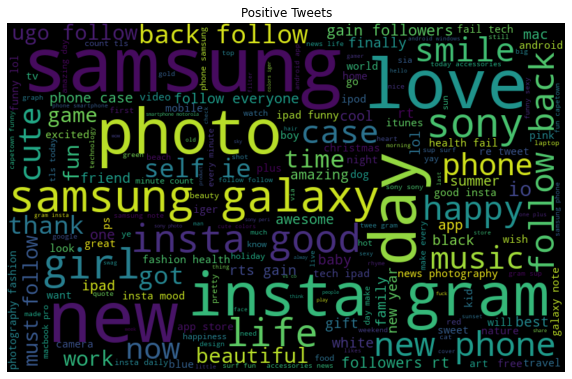

In [17]:
positive= train[train['label']==0]
all_words = ' '.join([text for text in positive['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=RANDOM_STATE, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Positive Tweets')
plt.axis('off')
plt.show()

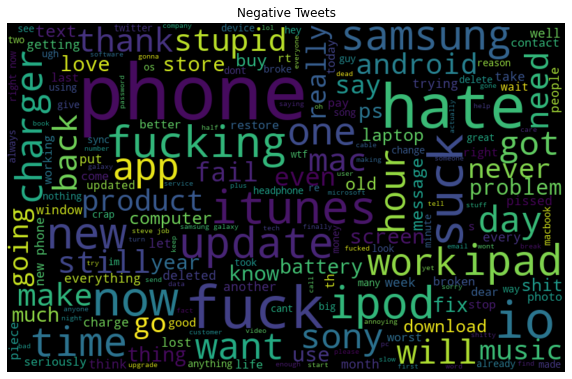

In [18]:
negative= train[train['label']==1]
all_words = ' '.join([text for text in negative['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=RANDOM_STATE, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Negative Tweets')
plt.axis('off')
plt.show()


In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(train['tweet'],
                                                 train['label'],
                                                 test_size=TEST_SIZE,
                                                 shuffle=SHUFFLE,
                                                 random_state=RANDOM_STATE)

In [20]:
t=text.Transformer('distilbert-base-uncased', maxlen=MAXLEN, class_names=[0,1])

x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_valid=x_valid.to_numpy()
y_valid=y_valid.to_numpy()

trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_valid, y_valid)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=BATCH_SIZE)


preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 29
	99percentile : 38


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 15
	95percentile : 24
	99percentile : 37


In [21]:
learner.reset_weights()


Model weights have been reset.


learner.fit_onecycle(LEARNING_RATE, EPOCHS)


In [24]:
TESTING_DATA_PATH = 'C://Users/Neelam/Downloads/test_oJQbWVk.csv'
TESTING_DATA_RESULT_PATH = 'C://Users/Neelam/Downloads/submit.csv'


In [25]:
test = pd.read_csv(TESTING_DATA_PATH)
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [26]:
test['tweet']=test['tweet'].apply(lambda x: clean_tweet_test(x))
test.head()

,id,tweet
0,7921,hate the new upgrade won't let me download app...
1,7922,currently shitting my fucking pants imac cash ...
2,7923,i'd like to puts some cd roms on my ipad is th...
3,7924,my ipod is officially dead lost all my and vid...
4,7925,been fighting itunes all night only want the m...


In [27]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
test_result=pd.Series(predictor.predict(test_tweet) for test_tweet in test['tweet'])


In [28]:
test_csv= pd.DataFrame({'id':pd.Series(test['id']), 'label':test_result})
test_csv.head()

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [29]:
test_csv['label'].value_counts()


0    1953
Name: label, dtype: int64

In [30]:
test_csv.to_csv(TESTING_DATA_RESULT_PATH, index=False)


In [31]:
learner.validate(class_names=t.get_classes())


              precision    recall  f1-score   support

           0       0.77      1.00      0.87       607
           1       0.00      0.00      0.00       185

    accuracy                           0.77       792
   macro avg       0.38      0.50      0.43       792
weighted avg       0.59      0.77      0.67       792



array([[607,   0],
       [185,   0]], dtype=int64)